<a href="https://colab.research.google.com/github/Amadou794545/prediction_du_flux_du_traffic/blob/main/Pr%C3%A9diction_du_flux_de_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Presentation du Projet

Ce projet vise à prédire le flux de trafic en se basant sur des données historiques, notamment le nombre de véhicules (voitures, vélos, bus, camions), l'heure et le jour de la semaine. En analysant ces données, nous cherchons à identifier les tendances dans le flux de trafic, à prédire les situations de trafic et à fournir des informations exploitables pour gérer la congestion et améliorer la mobilité urbaine. Le modèle aide également à optimiser les stratégies de contrôle du trafic et contribue aux objectifs de durabilité en réduisant les émissions et la consommation de carburant grâce à une meilleure gestion du trafic.

#Explication des données

* Heure : Horodatage de l'observation
*Date : Date de l'observation
*Jour de la semaine : Jour correspondant à l'observation
*CarCount : Nombre de voitures comptées au point d'observation
*BikeCount : Nombre de vélos comptés
*BusCount : Nombre de bus comptés
*TruckCount : Nombre de camions comptés
*Total : Nombre total de véhicules à l'horodatage
*Situation du trafic : L'état du trafic catégorisé (par exemple, les niveaux de congestion)

#Import des librairies

In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


#Importation des données

In [255]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/TrafficDataset.csv')
df.tail()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
2971,10:45:00 PM,09-11-2023,Thursday,6,0,2,34,42,normal
2972,11:00:00 PM,09-11-2023,Thursday,5,0,2,24,31,normal
2973,11:15:00 PM,09-11-2023,Thursday,11,2,2,32,47,normal
2974,11:30:00 PM,09-11-2023,Thursday,5,2,2,37,46,normal
2975,11:45:00 PM,09-11-2023,Thursday,10,1,0,25,36,normal


#Nettoyage du dataset

In [256]:
df.shape

(2976, 9)

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   object
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(5), object(4)
memory usage: 209.4+ KB


In [258]:
df['Traffic Situation'].unique()

array(['normal', 'low', 'heavy', 'high'], dtype=object)

* Heavy : forte circulation
* normal : normale
* low : faible circulation
* high : importante circulation

In [259]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [260]:
df.describe()

,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,62.184812,9.405578,10.546371,21.967742,104.104503
std,43.384148,9.275747,9.774527,10.312510,50.972085
min,5.000000,0.000000,0.000000,5.000000,25.000000
25%,15.000000,2.000000,2.000000,13.000000,53.000000
50%,61.000000,7.000000,8.000000,21.000000,101.000000
75%,97.000000,15.000000,17.000000,30.000000,144.000000
max,150.000000,50.000000,40.000000,60.000000,227.000000


In [261]:
df['Time'].unique()

array(['12:00:00 AM', '12:15:00 AM', '12:30:00 AM', '12:45:00 AM',
       '1:00:00 AM', '1:15:00 AM', '1:30:00 AM', '1:45:00 AM',
       '2:00:00 AM', '2:15:00 AM', '2:30:00 AM', '2:45:00 AM',
       '3:00:00 AM', '3:15:00 AM', '3:30:00 AM', '3:45:00 AM',
       '4:00:00 AM', '4:15:00 AM', '4:30:00 AM', '4:45:00 AM',
       '5:00:00 AM', '5:15:00 AM', '5:30:00 AM', '5:45:00 AM',
       '6:00:00 AM', '6:15:00 AM', '6:30:00 AM', '6:45:00 AM',
       '7:00:00 AM', '7:15:00 AM', '7:30:00 AM', '7:45:00 AM',
       '8:00:00 AM', '8:15:00 AM', '8:30:00 AM', '8:45:00 AM',
       '9:00:00 AM', '9:15:00 AM', '9:30:00 AM', '9:45:00 AM',
       '10:00:00 AM', '10:15:00 AM', '10:30:00 AM', '10:45:00 AM',
       '11:00:00 AM', '11:15:00 AM', '11:30:00 AM', '11:45:00 AM',
       '12:00:00 PM', '12:15:00 PM', '12:30:00 PM', '12:45:00 PM',
       '1:00:00 PM', '1:15:00 PM', '1:30:00 PM', '1:45:00 PM',
       '2:00:00 PM', '2:15:00 PM', '2:30:00 PM', '2:45:00 PM',
       '3:00:00 PM', '3:15:00 PM', '3:3

In [262]:
#convertissons 'Time' en minutes
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour * 60 + pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.minute
df['Time'].unique()

array([   0,   15,   30,   45,   60,   75,   90,  105,  120,  135,  150,
        165,  180,  195,  210,  225,  240,  255,  270,  285,  300,  315,
        330,  345,  360,  375,  390,  405,  420,  435,  450,  465,  480,
        495,  510,  525,  540,  555,  570,  585,  600,  615,  630,  645,
        660,  675,  690,  705,  720,  735,  750,  765,  780,  795,  810,
        825,  840,  855,  870,  885,  900,  915,  930,  945,  960,  975,
        990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140,
       1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305,
       1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425], dtype=int32)

In [263]:
df['Date'].unique()

array(['10-10-2023', '11-10-2023', '12-10-2023', '13-10-2023',
       '14-10-2023', '15-10-2023', '16-10-2023', '17-10-2023',
       '18-10-2023', '19-10-2023', '20-10-2023', '21-10-2023',
       '22-10-2023', '23-10-2023', '24-10-2023', '25-10-2023',
       '26-10-2023', '27-10-2023', '28-10-2023', '29-10-2023',
       '30-10-2023', '31-10-2023', '01-11-2023', '02-11-2023',
       '03-11-2023', '04-11-2023', '05-11-2023', '06-11-2023',
       '07-11-2023', '08-11-2023', '09-11-2023'], dtype=object)

In [264]:
print("donnée brut date:")
print(df['Date'].head(10))

donnée brut date:
0    10-10-2023
1    10-10-2023
2    10-10-2023
3    10-10-2023
4    10-10-2023
5    10-10-2023
6    10-10-2023
7    10-10-2023
8    10-10-2023
9    10-10-2023
Name: Date, dtype: object


In [265]:
#Conversion de 'date' en format datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

In [266]:
df['Date'].head(10)

,Date
0,2023-10-10
1,2023-10-10
2,2023-10-10
3,2023-10-10
4,2023-10-10
5,2023-10-10
6,2023-10-10
7,2023-10-10
8,2023-10-10
9,2023-10-10


In [267]:
#Conversion en jours depuis une date de référence
reference_date = pd.Timestamp('2023-10-09')
df['Date'] = (df['Date'] - reference_date).dt.days

Cette conversion est utile pour des analyses temporelles, comme des calculs de durées, des régressions, ou pour préparer des données pour des modèles d'apprentissage machine.

In [268]:
# Verify the final result
print("\nFinal Date Data:")
print(df.dtypes)
print(df.head())
print(df.tail())


Final Date Data:
Time                  int32
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object
   Time  Date Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
0     0     1         Tuesday        13          2         2          24   
1    15     1         Tuesday        14          1         1          36   
2    30     1         Tuesday        10          2         2          32   
3    45     1         Tuesday        10          2         2          36   
4    60     1         Tuesday        11          2         1          34   

   Total Traffic Situation  
0     41            normal  
1     52            normal  
2     46            normal  
3     50            normal  
4     48            normal  
      Time  Date Day of the week  CarCount  BikeCount  BusCount  TruckCount  \
2971  

In [269]:
#encodage

# Analyse exploratoire des données (EDA)

Histogramme pour les variables numériques

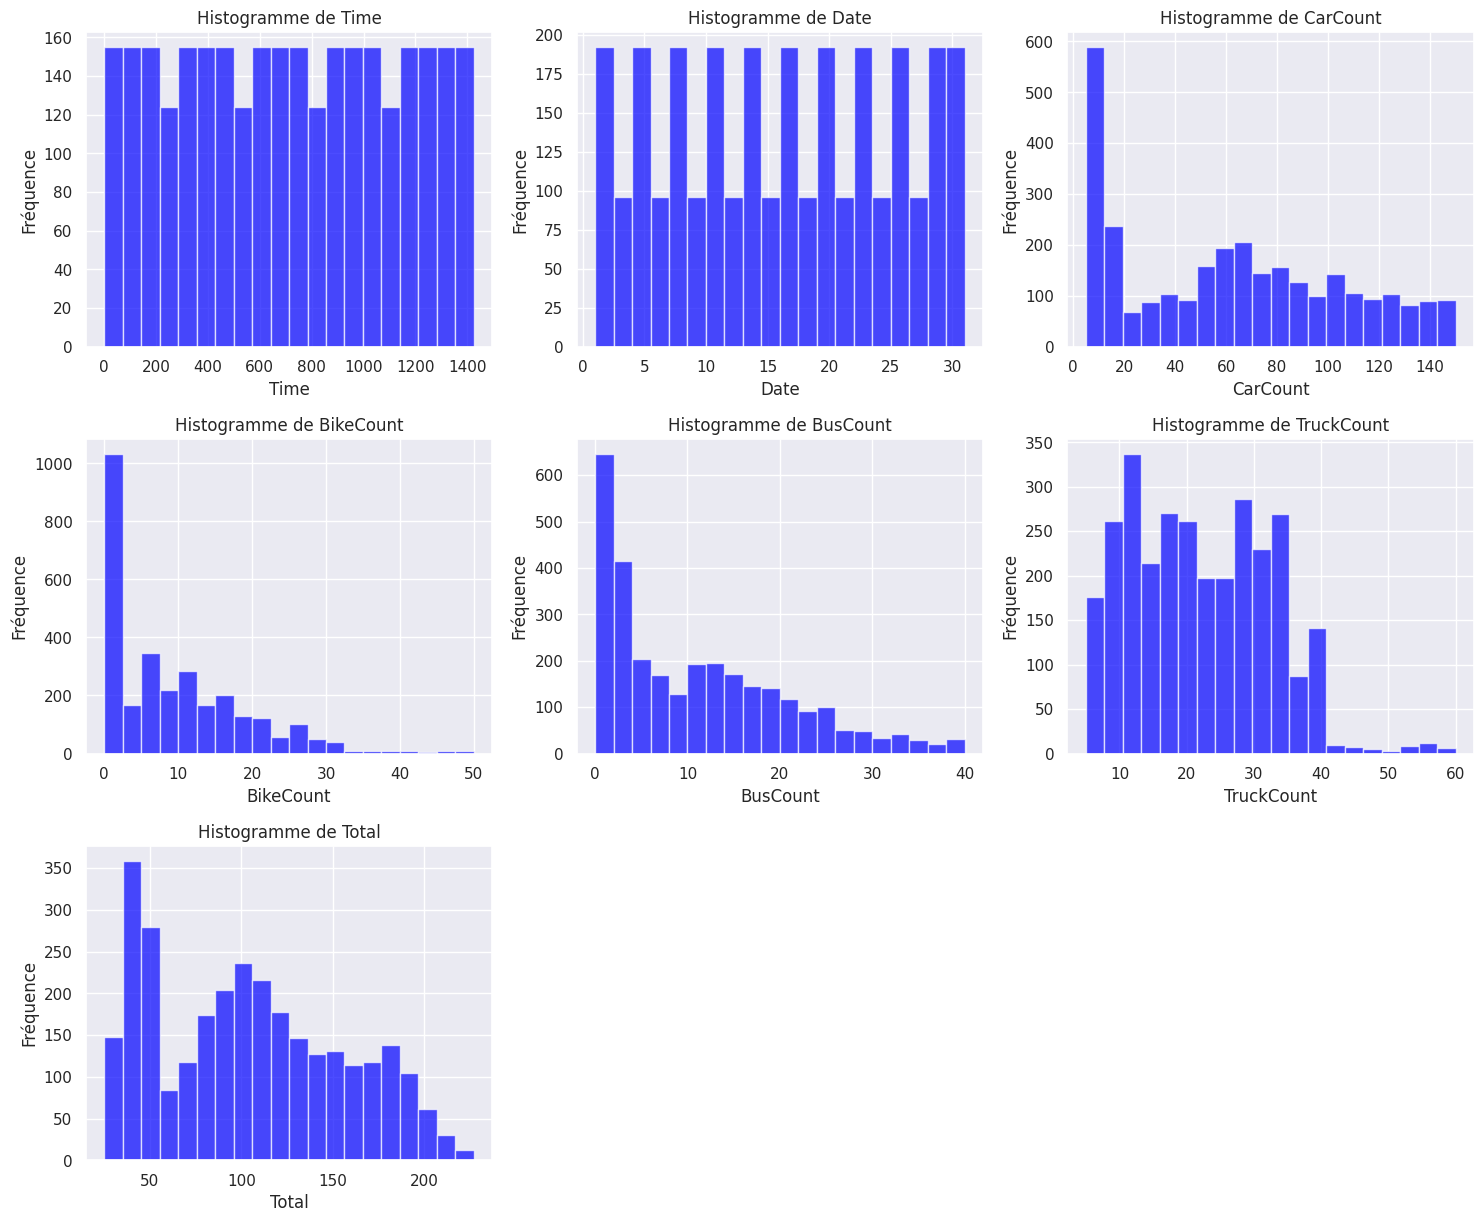

In [270]:
 # Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include='number')
 # Afficher un histogramme pour chaque colonne numérique
plt.figure(figsize=(15, 20))  # Adapter la taille de la figure en fonction du nombre de colonnes
num_cols = len(numeric_columns.columns)
 # Créer une grille de sous-graphiques adaptée au nombre de colonnes numériques
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(5, 3, i + 1)  # Adapté à 15 colonnes numériques
    plt.hist(df[column], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histogramme de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()
plt.close()

Boites à moustache pour les variables numériques

<ipython-input-271-f41c16936cf8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")
<ipython-input-271-f41c16936cf8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")
<ipython-input-271-f41c16936cf8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")
<ipython-input-271-f41c16936cf8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same e

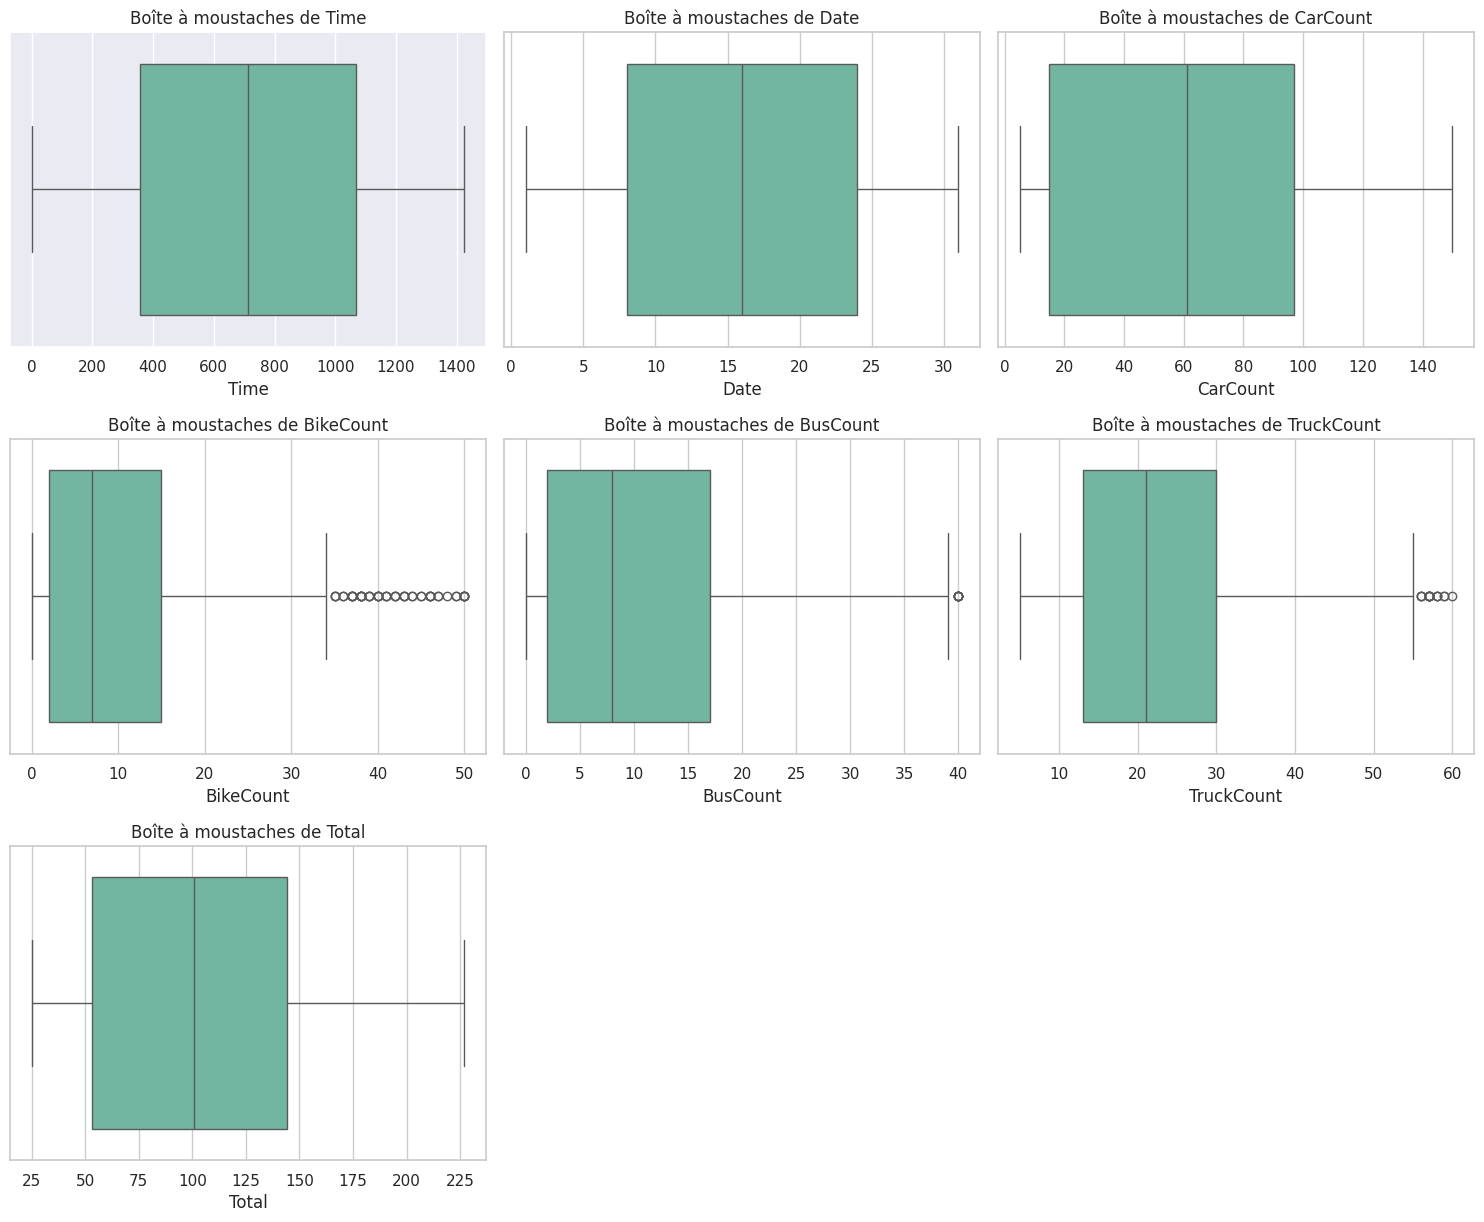

In [271]:
# Afficher des boîtes à moustaches pour chaque colonne numérique (avec axes séparés)
plt.figure(figsize=(15, 20))  # Adapter la taille de la figure en fonction du nombre de colonnes
num_cols = len(numeric_columns.columns)
 # Créer une grille de sous-graphiques pour les boîtes à moustaches
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(5, 3, i + 1)  # Adapté à 15 colonnes numériques
    sns.set(style="whitegrid")
    sns.boxplot(x=df[column], palette="Set2")
    plt.title(f'Boîte à moustaches de {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()
plt.close()


Diagrammes à barres pour les variables catégorielles

Analyse univariée de la colonne 'Day of the week':

Fréquence des catégories :
Day of the week
Tuesday      0.161290
Wednesday    0.161290
Thursday     0.161290
Friday       0.129032
Saturday     0.129032
Sunday       0.129032
Monday       0.129032
Name: proportion, dtype: float64



<ipython-input-272-94d4a4127a7d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


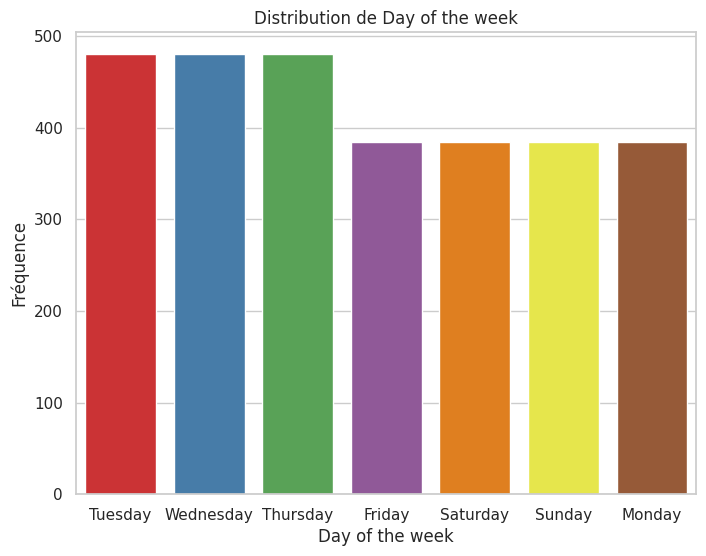

Analyse univariée de la colonne 'Traffic Situation':

Fréquence des catégories :
Traffic Situation
normal    0.693884
heavy     0.152890
low       0.094758
high      0.058468
Name: proportion, dtype: float64



<ipython-input-272-94d4a4127a7d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='Set1')


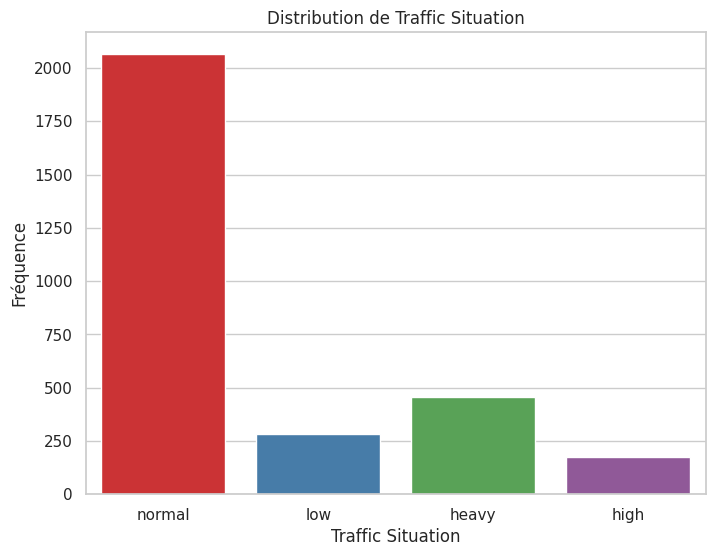

In [272]:
# Diagrammes à barres
for column in df.columns:
  if df[column].dtype == 'object':
      print(f"Analyse univariée de la colonne '{column}':\n")

      # Compter les occurrences de chaque catégorie
      value_counts = df[column].value_counts(normalize=True)
      print(f"Fréquence des catégories :\n{value_counts}\n")

      # Afficher un graphique à barres pour visualiser la distribution
      plt.figure(figsize=(8, 6))
      sns.countplot(data=df, x=column, palette='Set1')
      plt.title(f'Distribution de {column}')
      plt.xlabel(column)
      plt.ylabel('Fréquence')
      plt.show()
      plt.close()

Boites a moustache en fonction de la situation du traffic

<ipython-input-273-6dc6f7a54025>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=cat_var, palette="Set2")
<ipython-input-273-6dc6f7a54025>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=cat_var, palette="Set2")
<ipython-input-273-6dc6f7a54025>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=cat_var, palette="Set2")
<ipython-input-273-6dc6f7a54025>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` var

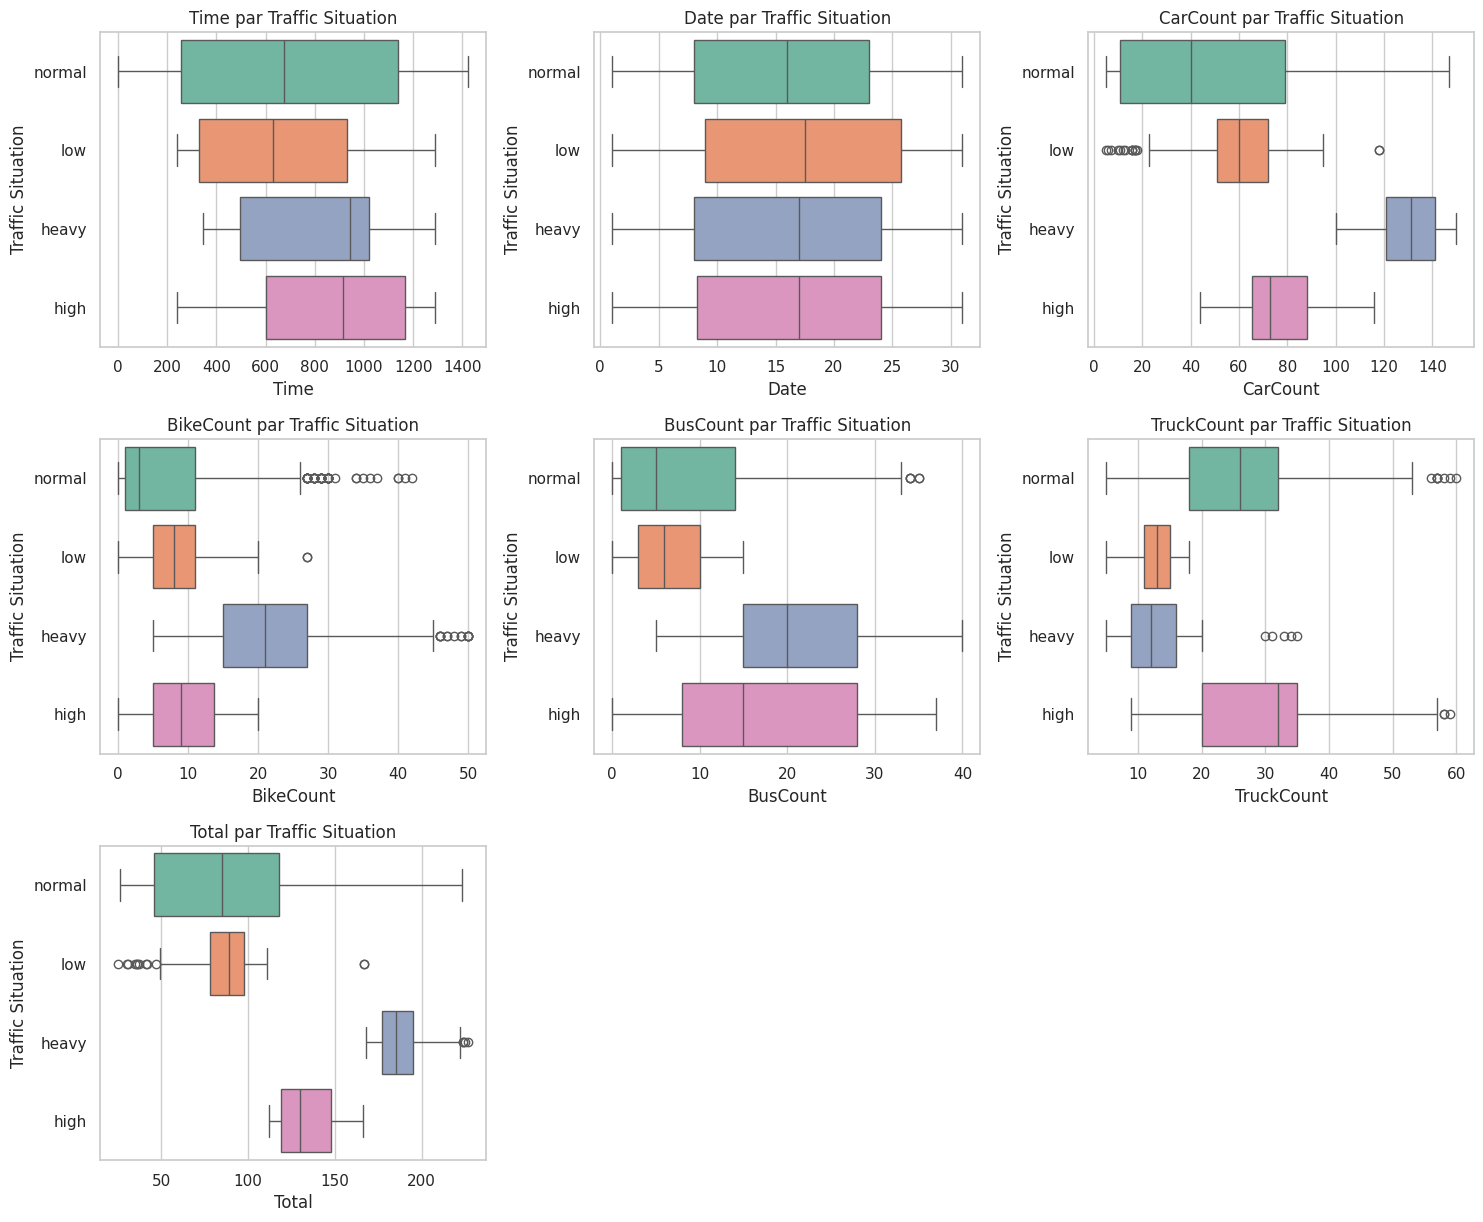

In [273]:
def plot_discretize_distributions(df, cat_var):
  plt.figure(figsize=(15, 20))

  # Sélectionner uniquement les colonnes numériques
  numeric_columns = df.select_dtypes(include='number')

  # Créer une grille de sous-graphiques pour les boîtes à moustaches
  for i, column in enumerate(numeric_columns.columns):
      plt.subplot(5, 3, i + 1)  # Adapté à 15 colonnes numériques
      sns.set(style="whitegrid")
      sns.boxplot(data=df, x=column, y=cat_var, palette="Set2")
      plt.title(column + ' par ' + cat_var)
      plt.xlabel(column)
      plt.ylabel(cat_var)

  plt.tight_layout()
  plt.show()
  plt.close()

plot_discretize_distributions(df, 'Traffic Situation')

graphiques à barre en fonction de la situation du traffic

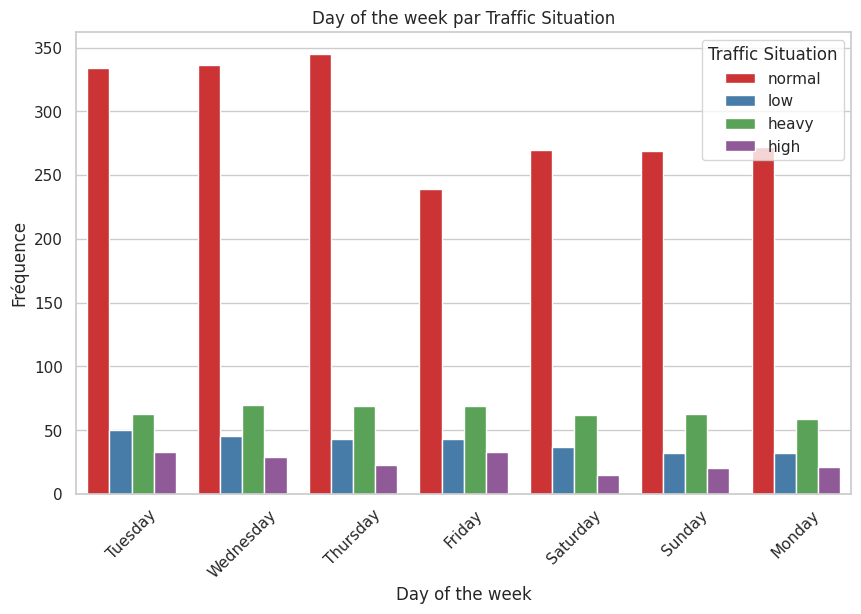

<ipython-input-274-0a8fd169d440>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=cat_var)


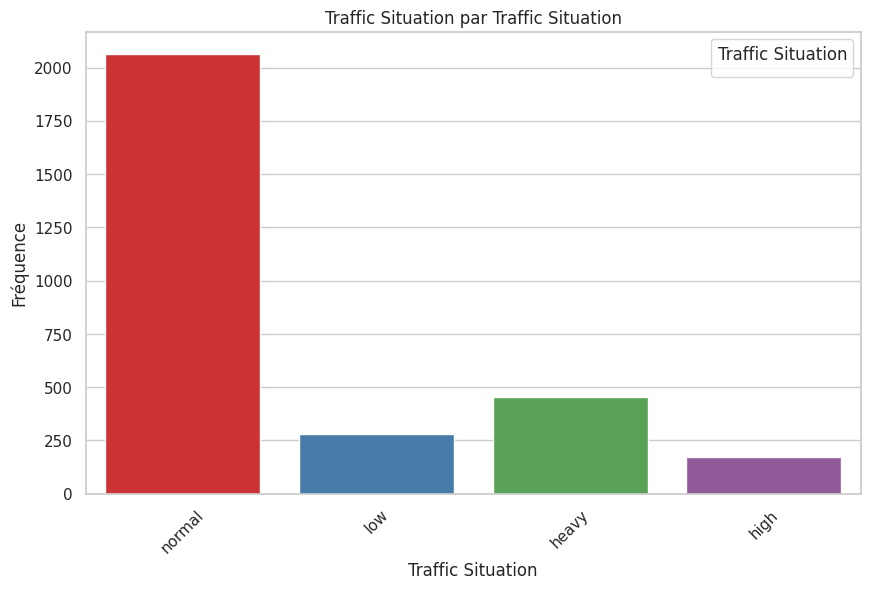

In [274]:
# Créer des graphiques à barres pour chaque colonne
def plot_bar_graphs(df,cat_var):
  for column in df.columns:
    if df[column].dtype == 'object':
      plt.figure(figsize=(10, 6))
      sns.countplot(data=df, x=column, hue=cat_var, palette='Set1')

      # Personnalisation du graphique
      plt.title(column + ' par ' + cat_var)
      plt.xlabel(column)
      plt.ylabel('Fréquence')
      plt.xticks(rotation=45)  # Faire pivoter les étiquettes de l'axe des x pour plus de lisibilité

      # Afficher le graphique
      plt.legend(title=cat_var)
      plt.show()
      plt.close()

plot_bar_graphs(df,'Traffic Situation')

Matrice de corrélation

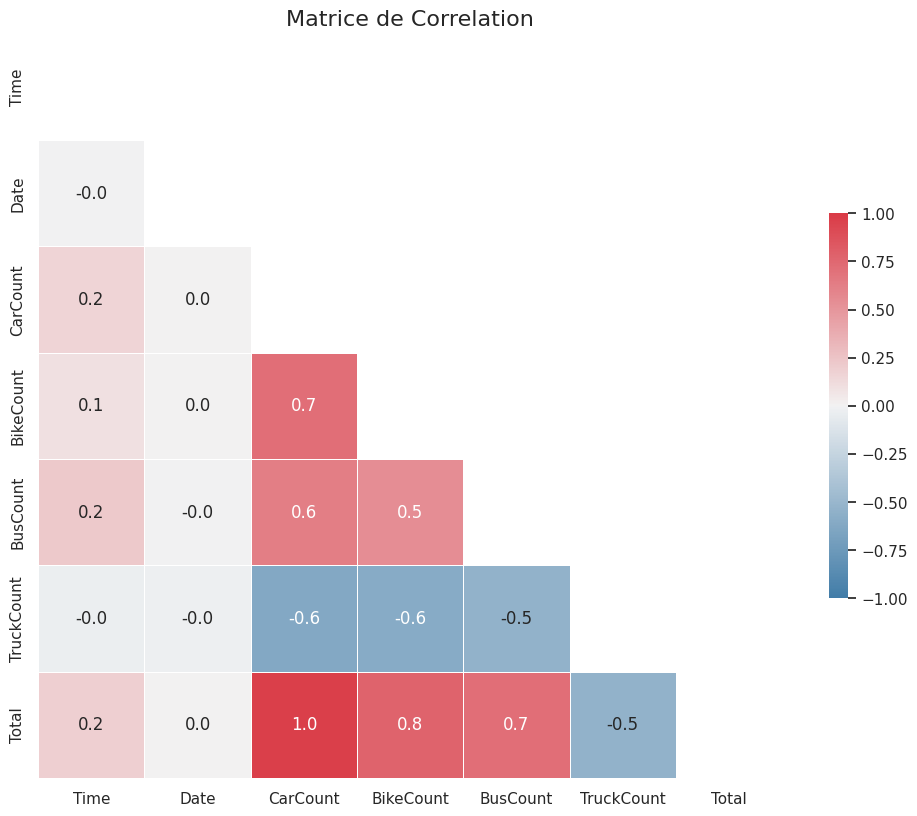

In [275]:
def plot_correlation_matrix(corr_mat):
  sns.set(style="white")
  mask = np.zeros_like(corr_mat, dtype=bool)
  mask[np.triu_indices_from(mask)] = True
  fig, ax = plt.subplots(figsize=(12, 10))
  cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
  sns.heatmap(
      corr_mat, mask=mask, cmap=cmap, annot=True,
      fmt=".1f", vmin=-1, vmax=1, center=0, square=True,
      linewidths=.5, cbar_kws={"shrink": .5}, ax=ax
  )
  ax.set_title("Matrice de Correlation", fontsize=16)
  sns.set(style="darkgrid")

corr_mat = df[[c for c in df.columns if c not in ['Day of the week','Traffic Situation']]].corr()
plot_correlation_matrix(corr_mat)

**Encodage de Traffic Situation**

'heavy' est encoder *en* 0,

'High' en 1,

'low' en 2,

'Normal' en 3.

In [276]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert 'Traffic Situation' to numerical values
df['TrafficSituationEncoder'] = label_encoder.fit_transform(df['Traffic Situation'])


In [277]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,TrafficSituationEncoder
0,0,1,Tuesday,13,2,2,24,41,normal,3
1,15,1,Tuesday,14,1,1,36,52,normal,3
2,30,1,Tuesday,10,2,2,32,46,normal,3
3,45,1,Tuesday,10,2,2,36,50,normal,3
4,60,1,Tuesday,11,2,1,34,48,normal,3
...,...,...,...,...,...,...,...,...,...,...
2971,1365,31,Thursday,6,0,2,34,42,normal,3
2972,1380,31,Thursday,5,0,2,24,31,normal,3
2973,1395,31,Thursday,11,2,2,32,47,normal,3
2974,1410,31,Thursday,5,2,2,37,46,normal,3


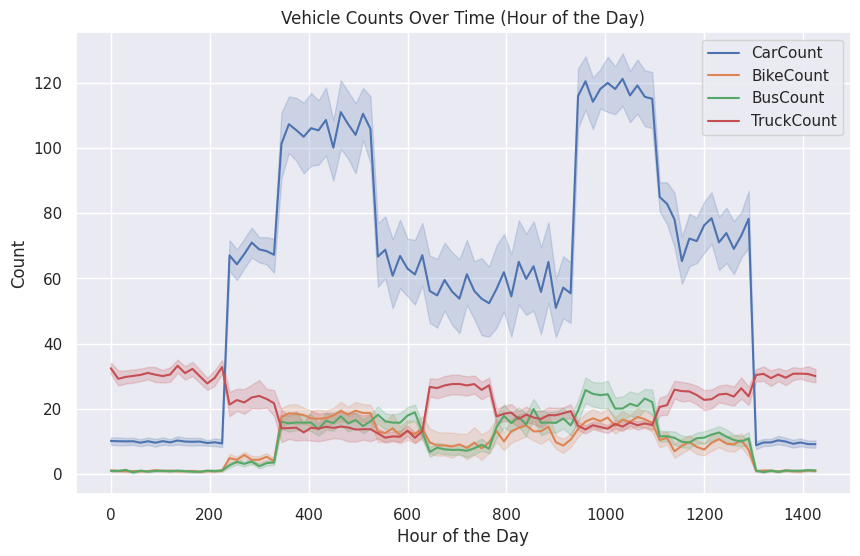

In [278]:
# 1. Vehicle Counts Over Time (Hour of the Day)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Time', y='CarCount', label='CarCount')
sns.lineplot(data=df, x='Time', y='BikeCount', label='BikeCount')
sns.lineplot(data=df, x='Time', y='BusCount', label='BusCount')
sns.lineplot(data=df, x='Time', y='TruckCount', label='TruckCount')
plt.title('Vehicle Counts Over Time (Hour of the Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend()
plt.show()

nous pouvons observé qu il y a beaucoup plus Car en circulation.Avec une augmentation le matin et le soir.

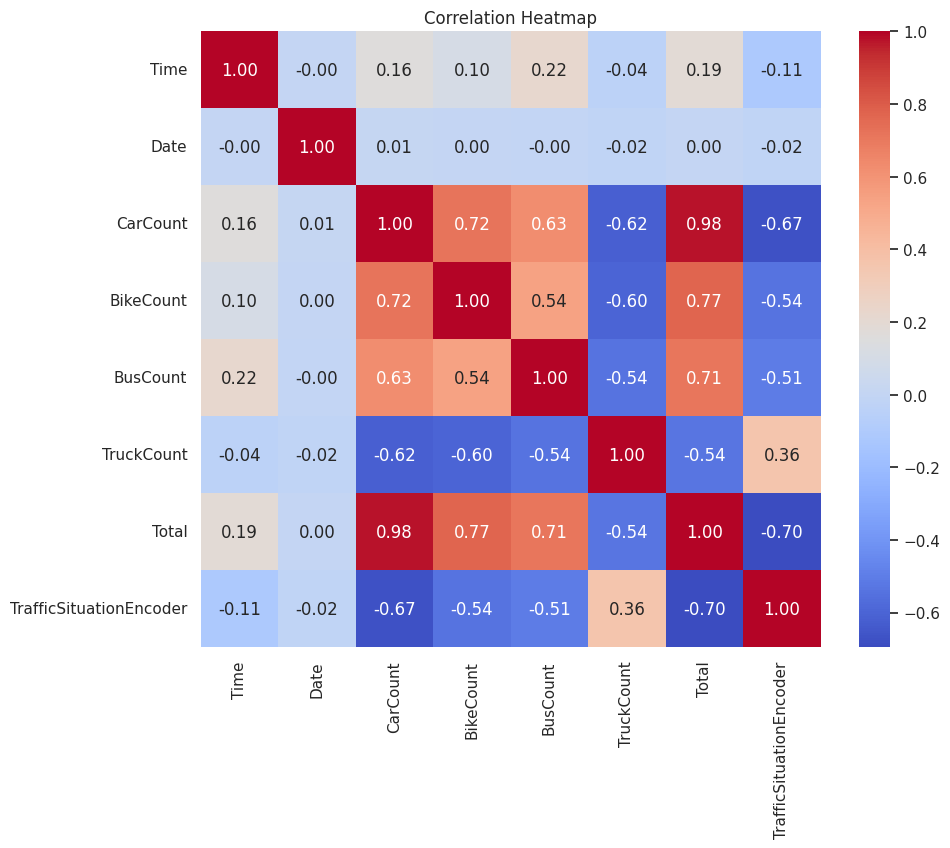

In [279]:
plt.figure(figsize=(10, 8))
corr_mat = df[[c for c in df.columns if c not in ['Day of the week','Traffic Situation']]].corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

CarCount et BikeCount : Ces variables ont une forte corrélation positive, ce qui indique qu’elles tendent à augmenter ou diminuer ensemble. TruckCount et Traffic Situation: Ces variables ont une forte corrélation négative, ce qui suggère que l’augmentation du trafic routier est associée à des conditions de circulation plus faibles.

#Hypothèse de l'analyse exploratoire des données (EDA)

* Le volume de trafic varie considérablement selon l’heure du jour et le jour de la semaine.
* Certains types de véhicules peuvent dominer le trafic à des moments précis (p. ex., plus de camions la nuit).
* La corrélation entre les différents types de véhicules peut indiquer des schémas dans le flux de circulation.
* Il pourrait être possible de prévoir les situations de circulation en utilisant des modèles d’apprentissage automatique basés sur le nombre de véhicules.



#Séparation de la donnée

In [288]:
#Encoder day of the week
le = LabelEncoder()
df['Day of the week'] = le.fit_transform(df['Day of the week'])


In [301]:
X = df.drop(['Traffic Situation', 'TrafficSituationEncoder','Total'], axis=1)
y = df['TrafficSituationEncoder']

#80% train & 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modélisation

Nous allons utiliser un Random Forest arbre aleatoire car la donnée que nous voulons prédire est une variable qualitatif donc nous devons faire de la classification et la Random Forest est particulièrement adaptée à la classification, car elle combine plusieurs arbres de décision pour améliorer la précision et la robustesse du modèle. De plus, elle est capable de gérer les relations non linéaires et les données bruitées, tout en réduisant le risque de surapprentissage grâce à l'agrégation des prédictions des différents arbres.

In [321]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [322]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [323]:
#faire une prédiction
y_pred = rf_model.predict(X_test)

In [324]:
#évaluation du model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 79   1   0   6]
 [  1  32   0   6]
 [  1   0  52   0]
 [  6   2   3 407]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91        86
           1       0.91      0.82      0.86        39
           2       0.95      0.98      0.96        53
           3       0.97      0.97      0.97       418

    accuracy                           0.96       596
   macro avg       0.93      0.92      0.93       596
weighted avg       0.96      0.96      0.96       596

Accuracy Score: 0.9563758389261745


#test du model

In [326]:
X_new=pd.DataFrame({
    'Time': [500],
    'Date': [30],
    'Day of the week': [5],
    'CarCount': [0],
    'BikeCount':  [0],
    'BusCount': [10],
    'TruckCount': [15],
})
X_new

rf_model.predict(X_new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([1])

#Variables importantes

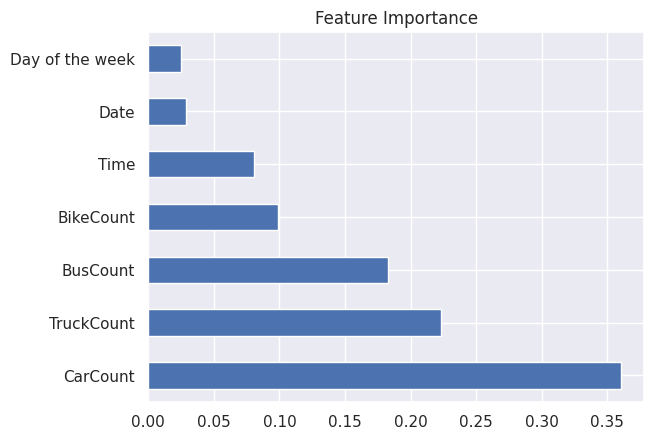

In [327]:
# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()
